In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pnevmoniya/sample_solution.csv
/kaggle/input/pnevmoniya/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya/test/test_img_10057.jpeg
/kaggle/input/pnevmoniya/test/test_img_10296.jpeg
/kaggle/input/pnevmoniya/test/test_img_10407.jpeg
/kagg

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

2.4.0
2.7.18


In [4]:
from fastai.vision.all import *
from ipywidgets import widgets

path = Path("/kaggle/input/pnevmoniya/train")

# Databook yaratganimizdan song DataLoader yaratamiz

In [5]:
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms= Resize(224)
)
dls = transports.dataloaders(path)

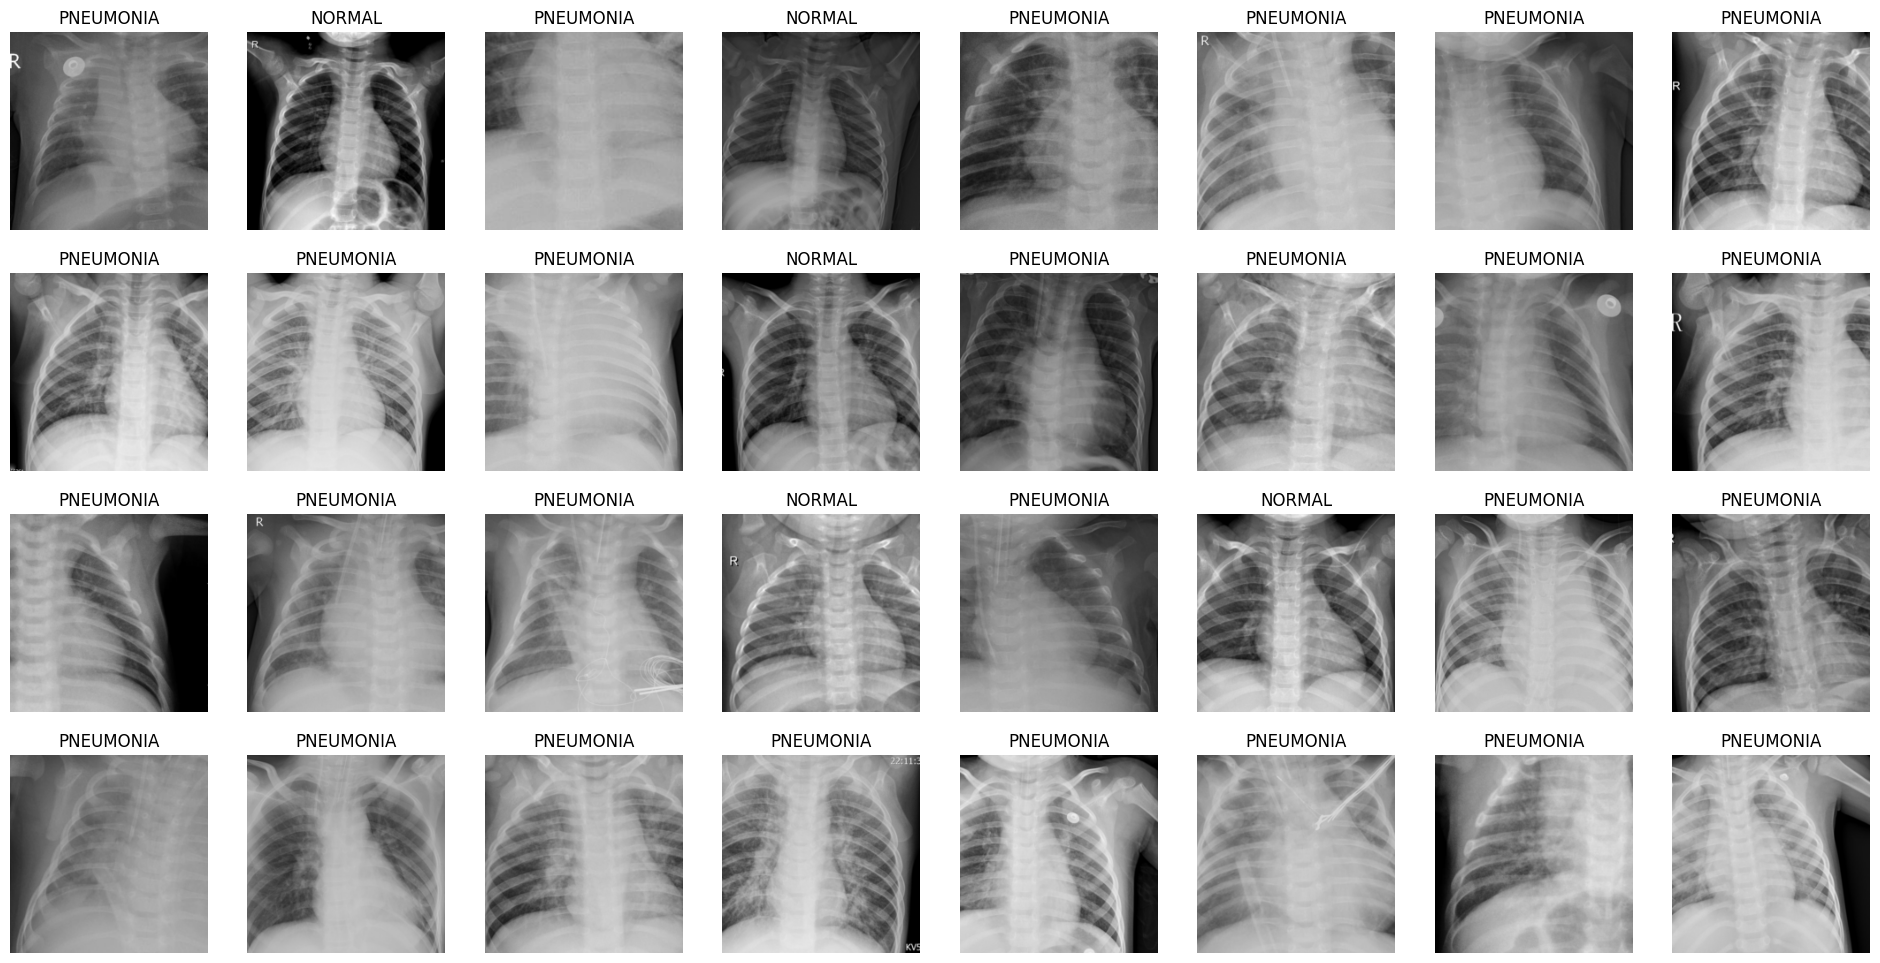

In [6]:
dls.train.show_batch(max_n=32, nrows = 4)

# Endi train qilib olamiz

In [7]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 212MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.459191,0.192267,0.941515,00:58


epoch,train_loss,valid_loss,accuracy,time
0,0.155881,0.086365,0.973154,00:54
1,0.088822,0.043968,0.982742,00:52
2,0.048227,0.043983,0.980825,00:55
3,0.024615,0.039245,0.985618,00:54


# Endi Plotting orqali tekshirib olamiza

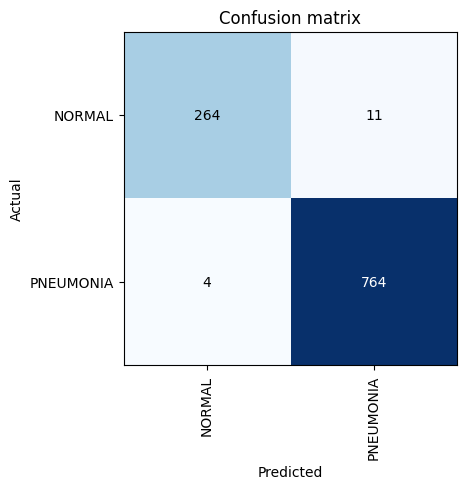

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

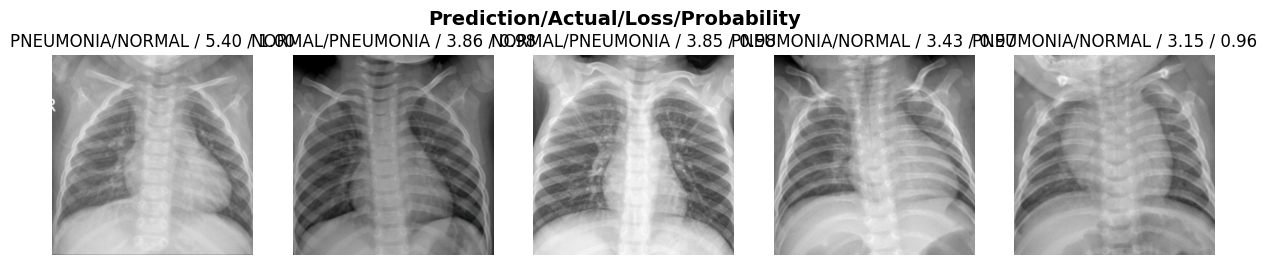

In [9]:
interp.plot_top_losses(5, nrows=1)

In [10]:
upload = widgets.FileUpload()
upload

FileUpload(value=(), description='Upload')

# Endi Prediction filemizga natijalar ni yuklaymiz

In [11]:
dic = {'NORMAL': 0, 'PNEUMONIA': 1}
ids = []
labels = []
path = Path('/kaggle/input/pnevmoniya/test')
image_paths = path.glob('*.jpeg')
for image in sorted(list(image_paths)):
    title = str(image).split("/")[-1]
    pred, pred_id, probs = learn.predict(image)
    ids.append(title)
    labels.append(dic[pred])

In [12]:
data = {'id': ids,'labels': labels}
prediction = pd.DataFrame(data)
prediction

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,1
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,1
622,test_img_10623.jpeg,1


In [13]:
prediction.to_csv("prediction.csv", index=False)